## PATIENT MEDICATION PREDICTION: WITH DECISION TREE MODEL


In this exercise, we utilize the Decision Tree classification algorithm to analyze historical patient data and their corresponding medication responses. Our objective is to construct a model that, once trained, can accurately predict the most suitable medication for a new patient or classify an unidentified patient based on their data.

#### DATASET
Let's import some important libraries and load the dataset and take a look at the first few rows to understand its structure and content.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load Dataset
df = pd.read_csv('patient_medication.csv') 

# Show First 5 Rows
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
df.shape

(200, 6)

The dataset comprises 6 columns and 200 rows which seems to contain information about patients and their prescribed drugs. Here's a brief overview of the columns.

#### DESCRIPTIVE STATISTICS
let's generate some basic statistics about the data to understand its distribution and characteristics.

In [3]:
# Generate descriptive statistics of the dataset
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


From the descriptive statistics, we can observe the following:
* Age: The age of patients ranges from 15 to 74 years. The average age is approximately 44 years. 50% of the patients are aged 45 years or below.
* Sex: There are 2 unique gender values: Male (M) and Female (F). Males are slightly more frequent (104) compared to females (96).
* BP (Blood Pressure): There are 3 unique blood pressure levels: HIGH, LOW, and NORMAL. Most patients have HIGH blood pressure (77).
* Cholesterol: There are 2 unique cholesterol levels: HIGH and NORMAL. HIGH cholesterol level is more common (103 patients).
* Na_to_K (Sodium-to-Potassium Ratio): The ratio ranges from approximately 6.27 to 38.25. The average ratio is approximately 16.08.
* Drug: There are 5 unique drug types. DrugY is the most frequently prescribed drug (91 patients).


#### DATA VISUALIZATION
Let's visualize the data to understand the distribution of different variables and their relationships. We'll start with the distribution of age and sodium-to-potassium ratio. We will create histograms to estimate the probability distribution these continuous variables.


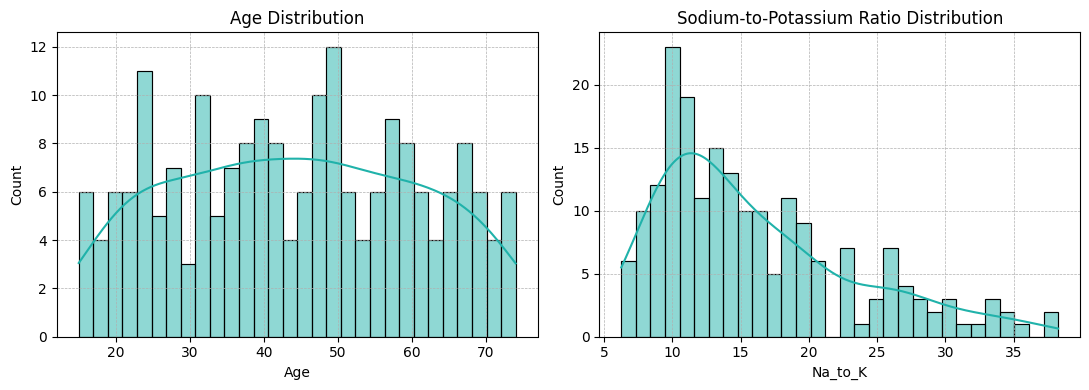

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.figure(figsize=(11, 4))

# Age Distribution
plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=30, kde=True, color='lightseagreen')
plt.title('Age Distribution')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Sodium-to-Potassium Ratio distribution
plt.subplot(1,2,2)
sns.histplot(df['Na_to_K'], bins=30, kde=True, color='lightseagreen')
plt.title('Sodium-to-Potassium Ratio Distribution')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


* Age Distribution: The age of patients seems to be quite uniformly distributed across the dataset, with a slight decrease in frequency for older ages.
* Sodium-to-Potassium Ratio Distribution: Most patients have a sodium-to-potassium ratio between 10 and 20, with a few outliers having a ratio above 30.


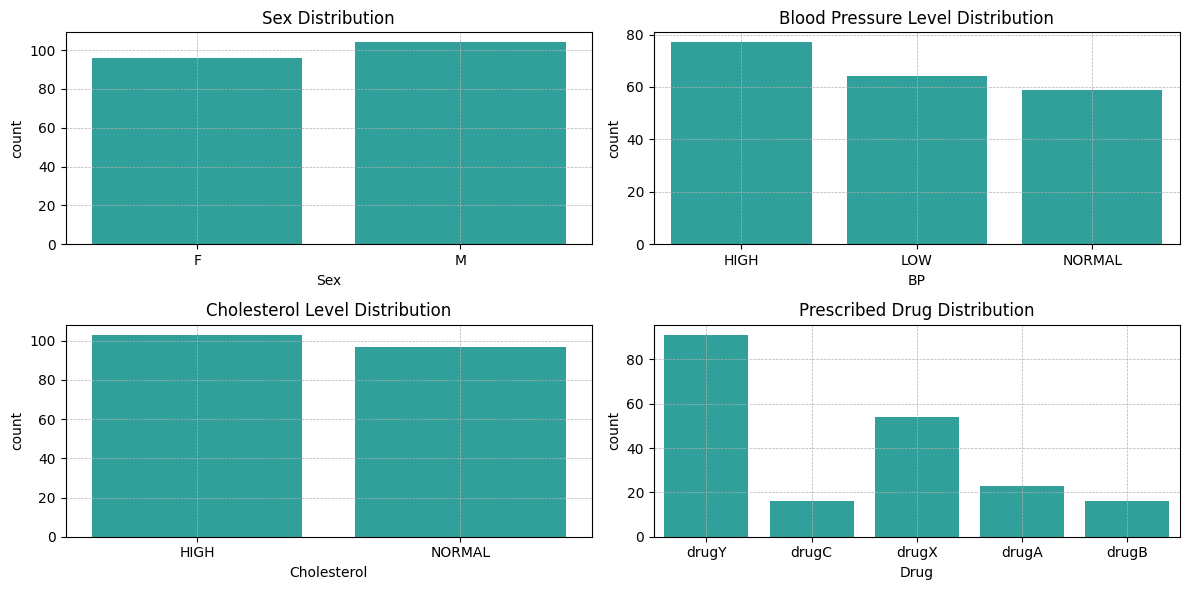

In [5]:
# Set style
plt.figure(figsize=(12, 6))

features = ['Sex', 'BP', 'Cholesterol', 'Drug']
titles = ['Sex Distribution', 'Blood Pressure Level Distribution', 
            'Cholesterol Level Distribution', 'Prescribed Drug Distribution']

for i, (feature, title) in enumerate(zip(features, titles)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=feature, color='lightseagreen')
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

* Gender Distribution: The dataset is fairly balanced in terms of gender, with a slightly higher number of males.
* Blood Pressure Level Distribution: A significant number of patients have high blood pressure, followed by those with normal and then low blood pressure.
* Cholesterol Level Distribution: The number of patients with high cholesterol is slightly more than those with normal cholesterol.
* Prescribed Drug Distribution: DrugY is the most commonly prescribed drug, followed by drugX. The other drugs have fewer prescriptions.


#### ENCODING CATEGORICAL VARIABLES
Machine learning algorithms work best with numerical data. Hence, we need to convert categorical variables into a format that can be provided to machine learning algorithms. We'll use one-hot encoding for this purpose. Let's encode the categorical columns: Sex, BP, and Cholesterol.


In [6]:
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,False,False,False,False
1,47,13.093,drugC,True,True,False,False
2,47,10.114,drugC,True,True,False,False
3,28,7.798,drugX,False,False,True,False
4,61,18.043,drugY,False,True,False,False


The categorical columns have been successfully one-hot encoded:
*	Sex: Encoded as Sex_M where 1 represents Male and 0 represents Female.
*	BP: Encoded into two columns, BP_LOW and BP_NORMAL. If both are 0, it means the BP is HIGH.
*	Cholesterol: Encoded as Cholesterol_NORMAL. If 0, it means the cholesterol is HIGH.


#### SPLITTING DATA
We'll split the data into features (X) and target (y). The target variable will be the 'Drug' column, while the rest of the columns will be our features. Then, we'll divide the data into training and test sets. We'll use 80% of the data for training and 20% for testing.


In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('Drug', axis=1)
y = df_encoded['Drug']

# Split the data into training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 6), (40, 6), (160,), (40,))

#### BUILDING DECISION TREE MODEL
Decision trees are a favored choice in machine learning due to their insightful nature and ease of interpretation. They can handle both numerical and categorical data, capturing non-linear relationships between variables. Their structure highlights the most significant features, making them valuable for feature selection. Furthermore, with clear decision boundaries in the data, they offer impressive predictive accuracy, all while presenting results in a visually comprehensible format.


Creating the Model: We will import the DecisionTreeClassifier from sklearn.tree. This will allow to create and train a decision tree model. We'll train the classifier using the training data.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

Fitting the Model: We will fit the decision tree model using the training data (X_train and y_train). The model learns patterns and relationships from this data.

In [10]:
# Train the classifier using the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Prediction of the Model: After training the classifier, we will use it to make predictions on the test data (X_test). The predictions are stored in the y_pred variable.

In [11]:
# Create prediction for the test data
y_pred = dt_classifier.predict(X_test)

Model Evaluation: We’ll calculate the accuracy of the model's predictions. The accuracy is the fraction of correct predictions out of total predictions. We’ll use the accuracy_score function from the metrics module to compare the true drug prescriptions (y_test) with the model's predictions (y_pred).



In [12]:
# Evaluation of the model
accuracy_score = metrics.accuracy_score(y_test, y_pred)
accuracy_score

1.0

> The Decision Tree classifier has achieved a test accuracy of 100%. As it means the model has perfectly predicted the drug prescriptions for the test data. However, it's essential to be cautious. A perfect score can sometimes indicate overfitting, where the model has learned the training data too well, including its noise and outliers. In this case, since our test accuracy is also 100%, it suggests that the model generalizes well to new, unseen data.

#### MODEL VISUALIZATION
Visualizing the decision tree can help us understand the decision-making process of the model. Each node of the tree represents a decision based on one of the features, which leads to either another decision node or a leaf node (a final decision). Let's visualize the decision tree we've trained.

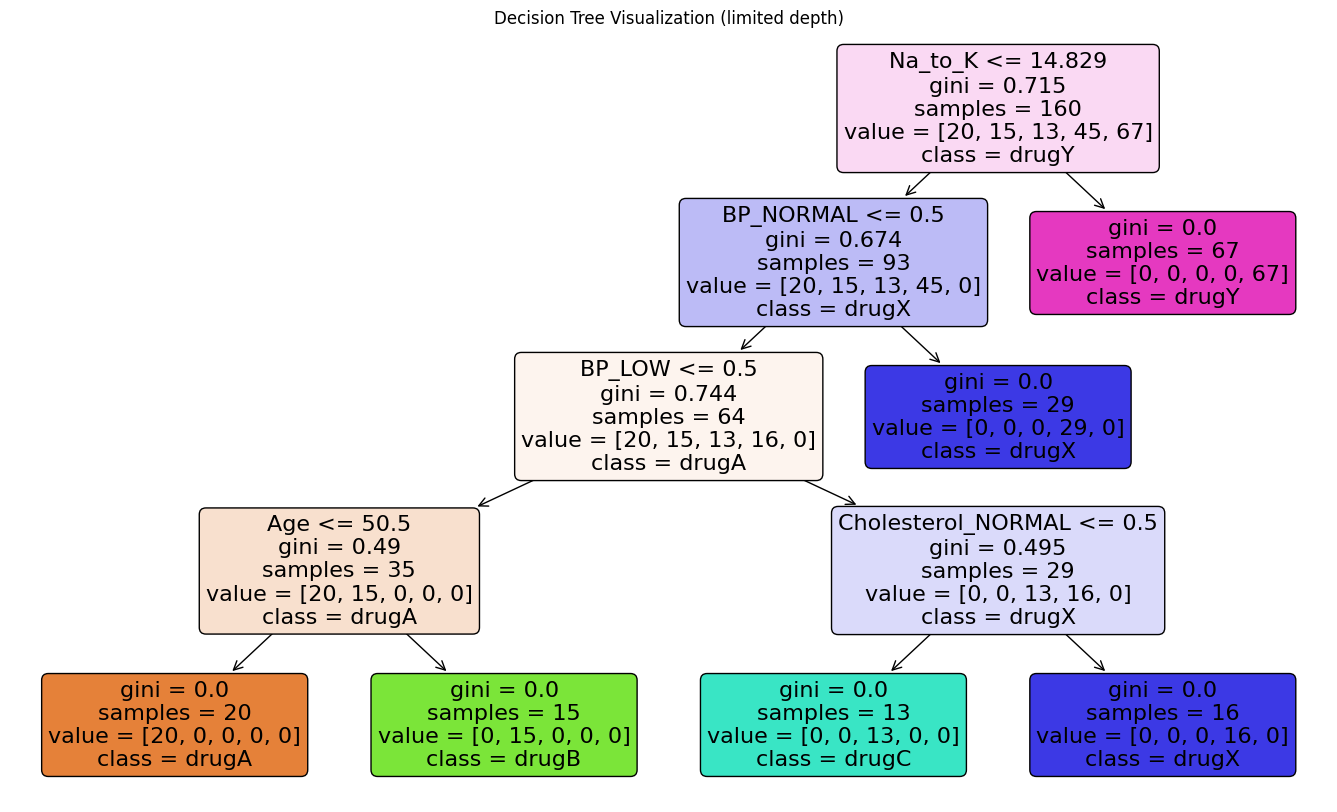

In [14]:
from sklearn.tree import plot_tree

# Visualize the decision tree with both feature_names and class_names
plt.figure(figsize=(17, 10))
plot_tree(dt_classifier, 
          filled=True, 
          feature_names=X.columns.tolist(),  # Convert columns to list
          class_names=dt_classifier.classes_.tolist(),  # Convert classes to list
          rounded=True,
          fontsize=16,
          max_depth=5)  # Limiting the depth for better visualization

plt.title("Decision Tree Visualization (limited depth)")
plt.show()

*	Root Node (Topmost Node): The decision at the root is based on the Na_to_K feature. If a patient's Na_to_K value is less than or equal to 14.829, the left branch is taken; otherwise, the right branch is taken. The Gini impurity at the root is 0.7, indicating some level of mixing between the classes. There are 160 samples at this node, and the majority class (class) is drugY.

*	Internal Nodes: As we move down the tree, the model makes decisions based on other features like Age, BP_LOW, and Cholesterol_NORMAL. The Gini impurity tends to decrease as we move down, which means the model is getting more certain about its predictions. The number of samples in each node also decreases, representing the filtered data based on previous decisions.

*	Leaf Nodes: These are the terminal nodes where the model makes its final prediction. For instance, the leftmost leaf node predicts drugA for all samples that end up there. The Gini impurity of 0 in the leaf nodes indicates that the model is entirely sure about its prediction for those samples.

The tree's branches show the various paths a sample can take based on its features, leading to a final prediction in one of the leaf nodes.


#### INSIGHTS
The Decision Tree classifier performed exceptionally well on the given dataset, achieving 100% accuracy on both the training and test sets. By visualizing the decision tree, we gained insights into the decision-making process of the model. This transparency is one of the advantages of decision trees, making them interpretable and easy to understand.